In [1]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Setup
POS_CASH_BALANCE: 
- monthly data about previous point of sale or cash loans clients have had with Home Credit. 
- Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_posc_balance = pd.read_csv(os.path.join(DATA_DIRECTORY, 'POS_CASH_balance.csv'), nrows= None)
df_posc_balance.head()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [0]:
df_posc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [0]:
df_posc_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [0]:
def statistical_analyzing(df_input):
  """
  This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
  process where we calculate statistics and make figures to find trends, anomalies,
  patterns, or relationships within the data. The goal of EDA is to learn what our
  data can tell us. It generally starts out with a high level overview, 
  then narrows in to specific areas as we find intriguing areas of the data. """
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

"""Plotting the continous features :    
1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
in a way that facilitates comparisons between variables.
2. Distribution graph :to check the linearity of the variables and look 
for skewness of features."""
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

In [0]:
cate_cols = [col for col in df_posc_balance.columns if df_posc_balance[col].dtype == 'object']
# cate_cols.remove('DAYS_DECISION')
# cate_cols.append('NFLAG_INSURED_ON_APPROVAL')

cons_cols = list(set(df_posc_balance.columns) - set(cate_cols))
# cons_cols.remove('SK_ID_CURR')
# cons_cols.remove('SK_ID_PREV')    

# key


In [0]:
statistical_analyzing(df_posc_balance[["SK_ID_CURR","SK_ID_PREV"]])

No. observations: 10001358
No. features: 2


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
SK_ID_CURR,int64,337252 (3.37%),0 (0.00%),0 (0.00%),0 (0.00%),189550.0,278654.0,367429.0,10001358.0,456255.0,2.784039e+05,100001.0,102763.745090,378061,181441,167326,364486,421593
SK_ID_PREV,int64,936325 (9.36%),0 (0.00%),0 (0.00%),0 (0.00%),1434405.0,1896565.0,2368963.0,10001358.0,2843499.0,1.903217e+06,1000001.0,535846.530722,2362026,2756694,1103578,1479722,2666693


# categorical


In [0]:
statistical_analyzing(df_posc_balance[cate_cols])

No. observations: 10001358
No. features: 1


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
NAME_CONTRACT_STATUS,object,9 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),NaN,NaN,NaN,10001358,NaN,NaN,NaN,NaN,Active,Active,Active,Active,Active


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


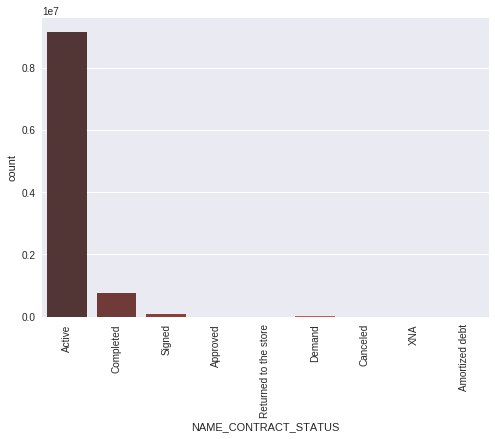

In [0]:
plot_categorical(cate_cols,None,df_posc_balance)

# continous

In [0]:
cons_cols.sort()
statistical_analyzing(df_posc_balance[cons_cols])


No. observations: 10001358
No. features: 7


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
CNT_INSTALMENT,float64,73 (0.00%),26071 (0.26%),0 (0.00%),0 (0.00%),10.0,12.0,24.0,9975287.0,92.0,1.708965e+01,1.0,11.995056,24.0,36.0,12.0,42.0,24.0
CNT_INSTALMENT_FUTURE,float64,79 (0.00%),26087 (0.26%),0 (0.00%),0 (0.00%),3.0,7.0,14.0,9975271.0,85.0,1.048384e+01,0.0,11.109058,16.0,33.0,5.0,32.0,7.0
MONTHS_BALANCE,int64,96 (0.00%),0 (0.00%),0 (0.00%),10001358 (100.00%),-54.0,-28.0,-13.0,10001358.0,-1.0,-3.501259e+01,-96.0,26.066570,-44.0,-84.0,-31.0,-17.0,-68.0
SK_DPD,int64,3400 (0.03%),0 (0.00%),0 (0.00%),0 (0.00%),0.0,0.0,0.0,10001358.0,4231.0,1.160693e+01,0.0,132.714043,0.0,0.0,0.0,0.0,0.0
SK_DPD_DEF,int64,2307 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),0.0,0.0,0.0,10001358.0,3595.0,6.544684e-01,0.0,32.762491,0.0,0.0,0.0,0.0,0.0
SK_ID_CURR,int64,337252 (3.37%),0 (0.00%),0 (0.00%),0 (0.00%),189550.0,278654.0,367429.0,10001358.0,456255.0,2.784039e+05,100001.0,102763.745090,367825.0,103411.0,121028.0,219892.0,153270.0
SK_ID_PREV,int64,936325 (9.36%),0 (0.00%),0 (0.00%),0 (0.00%),1434405.0,1896565.0,2368963.0,10001358.0,2843499.0,1.903217e+06,1000001.0,535846.530722,2503351.0,1364631.0,2658791.0,1329619.0,1938386.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

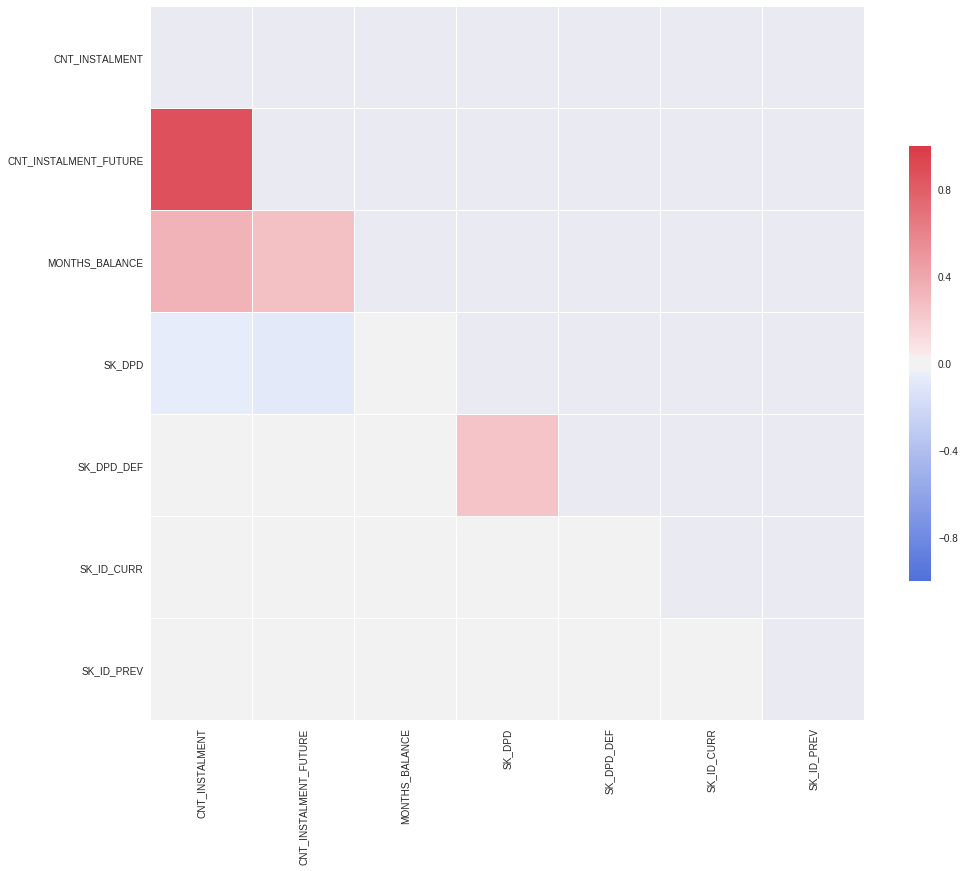

In [0]:
correlations = df_posc_balance[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#correlations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Column name: CNT_INSTALMENT
> No.outliner: 498724 



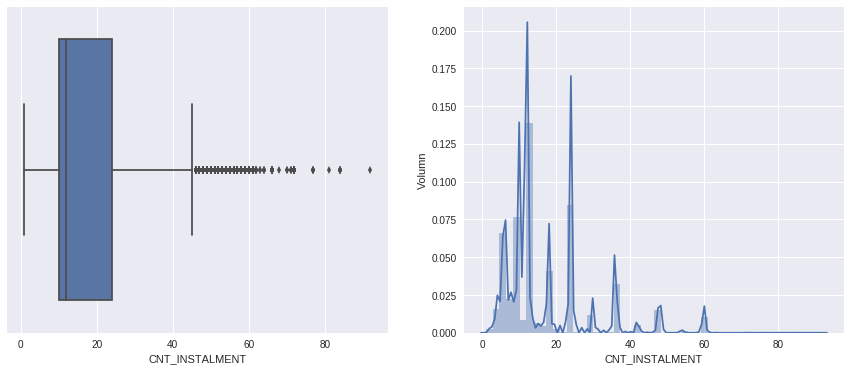

Column name: CNT_INSTALMENT_FUTURE
> No.outliner: 694783 



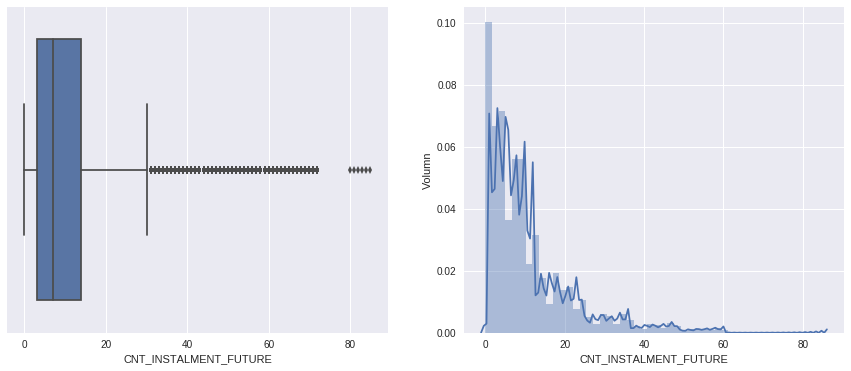

Column name: MONTHS_BALANCE
> No.outliner: 0 



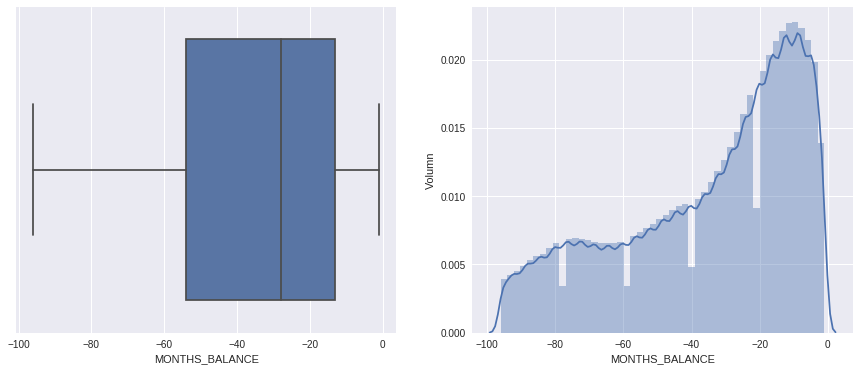

Column name: SK_DPD
> No.outliner: 295227 



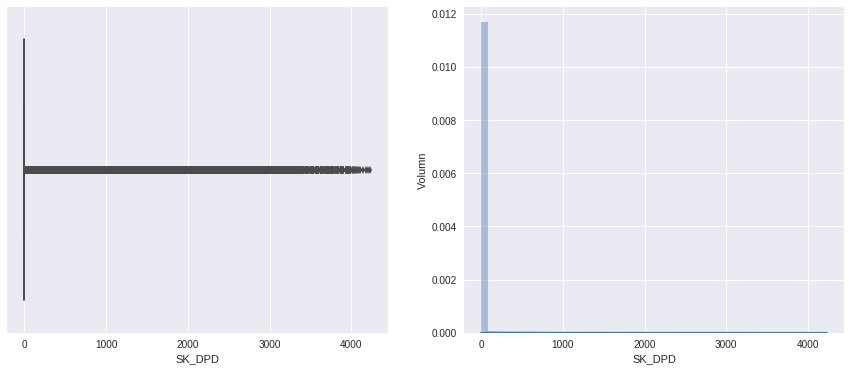

Column name: SK_DPD_DEF
> No.outliner: 113969 



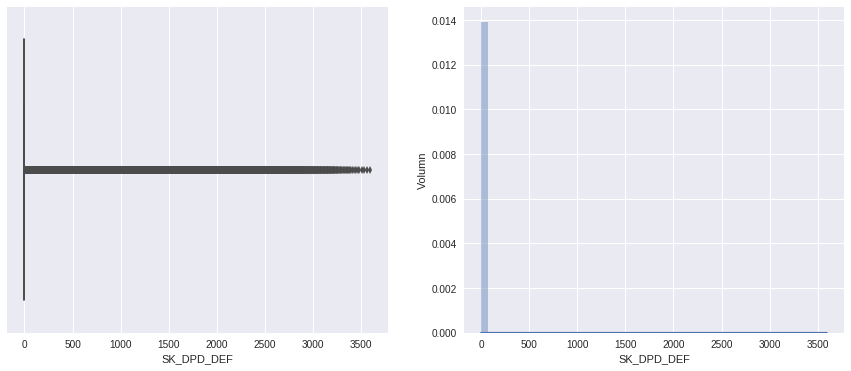

Column name: SK_ID_CURR
> No.outliner: 0 



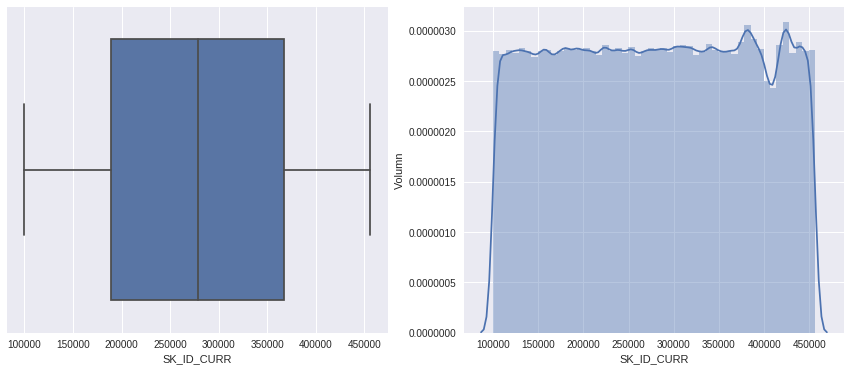

Column name: SK_ID_PREV
> No.outliner: 0 



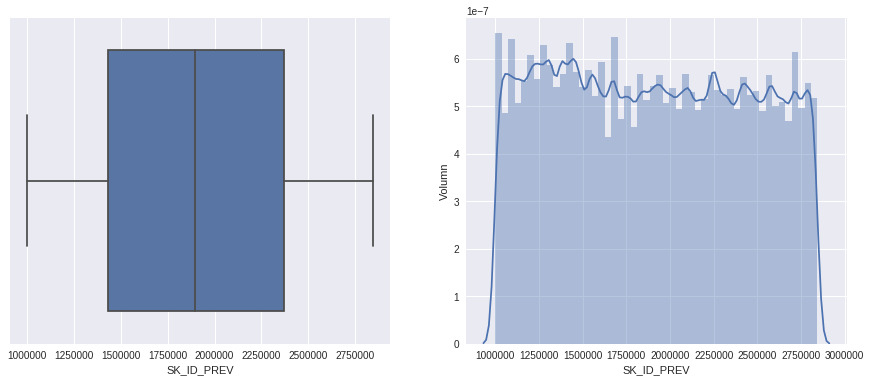

In [0]:
plot_continous(cons_cols, None, df_posc_balance)

# Cleaning

In [0]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping to generate new feature and then merging into origin df"""
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  

In [0]:
def get_pos_cash(path, num_rows= None):
  """ Process POS_CASH_balance.csv and return a pandas dataframe. """
  pos = pd.read_csv(os.path.join(path, 'POS_CASH_balance.csv'), nrows= num_rows)
  pos, categorical_cols = one_hot_encoder(pos, nan_as_category= False)

  POS_CASH_AGG = {      
      'SK_ID_PREV': ['nunique'],
      'CNT_INSTALMENT':['max', 'mean', 'sum'],
      'CNT_INSTALMENT_FUTURE':['max', 'mean', 'sum'],
      'MONTHS_BALANCE': ['min', 'max', 'size'],
      'SK_DPD': ['max', 'mean', 'sum', 'var'],
      'SK_DPD_DEF': ['max', 'mean', 'sum'],}

  # Aggregate by SK_ID_CURR
  categorical_agg = {key: ['mean'] for key in categorical_cols}
  pos_agg = group(pos, 'POS_', {**POS_CASH_AGG, **categorical_agg})  
  return pos_agg

# FE
**POS_CASH_BALANCE**: 
- Contains 10,001,358 entries, total 8 columns
- monthly data about previous point of sale or cash loans clients have had with Home Credit. 
- Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

**FE**
- Feature Selection is done
- Feature extraction
  - Generating features based on internal data
    - SK_ID_PREV sử dụng hàm nunique 
    - CNT_ các features dạng đếm dùng 'max', 'mean', 'sum' tương tự cho các biến liên tục    
  - Generating features based on external data
    - Bảng này thể hiện các điểm trả góp, nên thông tin tương đối độc nhất. Có thể được liên kết đến các bảng khác

- Initial features
  - 'NAME_CONTRACT_STATUS'  tình trạng hợp đồng. Từ 'NAME_CONTRACT_STATUS' có thể biết được tình trạng của Credit Card ntn? 8 phần là Active, 1.5 là Compelete.... Từ đây chúng ta có thể tạo ra dữ liệu với 
  - 'CNT_INSTALMENT',  đêm số lần trả góp còn lại 
  - 'CNT_INSTALMENT_FUTURE',  đếm số lần trả góp tương lai
  - 'MONTHS_BALANCE', 
  - 'SK_DPD',  (days past due) thể hiện thông tin trả hạn trễ (tương tư có liên quan SK_DPD_DEF) 
  - 'SK_DPD_DEF',
  - 'SK_ID_CURR',
  - 'SK_ID_PREV
- New features - Domain knowledge features :
  - FLAG_COMPLETED_BEFORE_MEAN
  - REMAINING_INSTALMENTS_RATIO = giá trị cuối trong CNT_INSTALMENT_FUTURE_LAST / giá trị cuối CNT_INSTALMENT
 
   




In [0]:
pos = df_posc_balance.copy()

In [0]:
  """ FLAG_COMPLETED_BEFORE_MEAN tìm các khách hàng đã hoàn thành việc 
  trả tiền vào thẻ,   và có số lần trả đầu tiên lớn hơn lần cuối
  """
  
  pos, categorical_cols = one_hot_encoder(pos, nan_as_category= False)
  
  # Late payment
  pos['FLAG_LATE_PAYMENT'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)

  POS_CASH_AGG = {      
      'SK_ID_PREV': ['nunique'],
      'CNT_INSTALMENT':['max', 'mean', 'sum'],
      'CNT_INSTALMENT_FUTURE':['max', 'mean', 'sum'],
      'MONTHS_BALANCE': ['min', 'max', 'size'],
      'SK_DPD': ['max', 'mean', 'sum', 'var'],
      'SK_DPD_DEF': ['max', 'mean', 'sum'],
      'FLAG_LATE_PAYMENT': ['mean'],
  }

  # Aggregate by SK_ID_CURR
  categorical_agg = {key: ['mean'] for key in categorical_cols}
  pos_agg = group(pos, 'POS_', {**POS_CASH_AGG, **categorical_agg})
  
  # Marking clients who paid installment before mean
  df_mark = (pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE']).
             groupby('SK_ID_PREV', as_index=False).agg(
                 {'SK_ID_CURR':['first'],
                  'NAME_CONTRACT_STATUS_Completed': ['mean'],
                  'CNT_INSTALMENT': ['first','last'],  
                  'CNT_INSTALMENT_FUTURE' : ['last'],
                 }))
  df_mark.columns = pd.Index(['{}_{}'.format(e[0], e[1].upper())
                             for e in df_mark.columns.tolist()])
  df_mark.rename(columns={'SK_ID_PREV_': 'SK_ID_PREV', 
                        'SK_ID_CURR_FIRST': 'SK_ID_CURR',
                        'CNT_INSTALMENT_FUTURE_LAST':'REMAINING_INSTALMENTS',
                         }, inplace=True)  
  df_mark['FLAG_COMPLETED_BEFORE_MEAN'] = np.where(
      (df_mark['CNT_INSTALMENT_FIRST'] - df_mark['CNT_INSTALMENT_LAST']) > 0
      and df_mark['NAME_CONTRACT_STATUS_Completed_MEAN'] > 0, 1, 0)
#   df_mark.apply(
#       lambda x: 1 if (x['CNT_INSTALMENT_FIRST'] - x['CNT_INSTALMENT_LAST']) > 0
#       and x['NAME_CONTRACT_STATUS_Completed_MEAN'] > 0 else 0, axis=1)
  
  df_mark['REMAINING_INSTALMENTS_RATIO'] = (df_mark['REMAINING_INSTALMENTS']
                                                /df_mark['CNT_INSTALMENT_LAST'])  
  pos_agg = group_and_merge(df_mark, pos_agg, 'POS_', 
                         {'FLAG_COMPLETED_BEFORE_MEAN': ['median','mean'],
                          'REMAINING_INSTALMENTS_RATIO': ['mean'],})
  

In [0]:
df_mark.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS_Completed_MEAN,CNT_INSTALMENT_FIRST,CNT_INSTALMENT_LAST,POS_REMAINING_INSTALMENTS,FLAG_COMPLETED_BEFORE_MEAN,REMAINING_INSTALMENTS_RATIO
0,1000001,158271,0.333333,12.0,2.0,0.0,1,0.00
1,1000002,101962,0.200000,4.0,4.0,0.0,0,0.00
2,1000003,252457,0.000000,12.0,12.0,9.0,0,0.75
3,1000004,260094,0.125000,10.0,7.0,0.0,1,0.00
4,1000005,176456,0.090909,10.0,10.0,0.0,0,0.00


In [0]:
def get_pos_cash_3(path, num_rows= None):
  """ Process POS_CASH_balance.csv and return a pandas dataframe. """
  pos = pd.read_csv(os.path.join(path, 'POS_CASH_balance.csv'), nrows= num_rows)
  pos, categorical_cols = one_hot_encoder(pos, nan_as_category= False)
  
  # Late payment
  pos['FLAG_LATE_PAYMENT'] = np.where(pos['SK_DPD'] > 0,1,0)
  #pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)

  POS_CASH_AGG = {      
      'SK_ID_PREV': ['nunique'],
      'CNT_INSTALMENT':['max', 'mean', 'sum'],
      'CNT_INSTALMENT_FUTURE':['max', 'mean', 'sum'],
      'MONTHS_BALANCE': ['min', 'max', 'size'],
      'SK_DPD': ['max', 'mean', 'sum', 'var'],
      'SK_DPD_DEF': ['max', 'mean', 'sum'],
      'FLAG_LATE_PAYMENT': ['mean'],
  }

  # Aggregate by SK_ID_CURR
  categorical_agg = {key: ['mean'] for key in categorical_cols}
  pos_agg = group(pos, 'POS_', {**POS_CASH_AGG, **categorical_agg})
  
  # Marking clients who paid installment before mean
  df_mark = (pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE']).
             groupby('SK_ID_PREV', as_index=False).agg(
                 {'SK_ID_CURR':['first'],
                  'NAME_CONTRACT_STATUS_Completed': ['mean'],
                  'CNT_INSTALMENT': ['first','last'],  
                  'CNT_INSTALMENT_FUTURE' : ['last'],
                 }))
  df_mark.columns = pd.Index(['{}_{}'.format(e[0], e[1].upper())
                             for e in df_mark.columns.tolist()])
  df_mark.rename(columns={'SK_ID_PREV_': 'SK_ID_PREV', 
                        'SK_ID_CURR_FIRST': 'SK_ID_CURR',
                        'CNT_INSTALMENT_FUTURE_LAST':'REMAINING_INSTALMENTS',
                         }, inplace=True)   

  df_mark['FLAG_COMPLETED_BEFORE_MEAN'] = np.where(
      ((df_mark['CNT_INSTALMENT_FIRST'] - df_mark['CNT_INSTALMENT_LAST'] > 0) 
       & (df_mark['NAME_CONTRACT_STATUS_Completed_MEAN'] > 0)), 1, 0)  
  
  df_mark['REMAINING_INSTALMENTS_RATIO'] = (df_mark['REMAINING_INSTALMENTS']
                                                /df_mark['CNT_INSTALMENT_LAST'])  
  pos_agg = group_and_merge(df_mark, pos_agg, 'POS_', 
                         {'FLAG_COMPLETED_BEFORE_MEAN': ['median','mean'],
                          'REMAINING_INSTALMENTS_RATIO': ['mean'],})
  del df_mark; gc.collect()  
  
  # Generate more feature following the 'MONTHS_BALANCE'
  # Last month balance of each credit card application
  last_ids = pos.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
  last_months_df = pos[pos.index.isin(last_ids)] 
  pos_agg = group_and_merge(last_months_df,pos_agg,'CC_LAST_',                           
                           {'CNT_INSTALMENT':['max', 'mean', 'sum'],
                            'CNT_INSTALMENT_FUTURE':['max', 'mean', 'sum'],
                            'FLAG_LATE_PAYMENT': ['mean'],})

  # Aggregations for last x months
  for months in [12, 24, 48]:    
    pos_prev_id = pos[pos['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
    pos_recent = pos[pos['SK_ID_PREV'].isin(pos_prev_id)]
    prefix = 'POS_{}M_'.format(months)
    pos_agg = group_and_merge(pos_recent, pos_agg, prefix,                              
                             {'CNT_INSTALMENT':['max', 'mean', 'sum'],
                              'CNT_INSTALMENT_FUTURE':['max', 'mean', 'sum'],
                              'FLAG_LATE_PAYMENT': ['mean'],})


  return pos_agg
  


In [12]:
%%time
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

pos = get_pos_cash_3(DATA_DIRECTORY, num_rows)

CPU times: user 2min 37s, sys: 2.51 s, total: 2min 39s
Wall time: 2min 40s


In [0]:
pos.head()

,SK_ID_CURR,POS_SK_ID_PREV_NUNIQUE,POS_CNT_INSTALMENT_MAX,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_SUM,POS_CNT_INSTALMENT_FUTURE_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MAX,...,POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_FLAG_COMPLETED_BEFORE_MEAN_MEDIAN,POS_REMAINING_INSTALMENTS_RATIO_MEAN
0,100001,2,4.0,4.000000,36.0,4.0,1.444444,13.0,-96,-53,...,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,0.0,0.000000
1,100002,1,24.0,24.000000,456.0,24.0,15.000000,285.0,-19,-1,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.250000
2,100003,3,12.0,10.107143,283.0,12.0,5.785714,162.0,-77,-18,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.027778
3,100004,1,4.0,3.750000,15.0,4.0,2.250000,9.0,-27,-24,...,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,1.0,0.000000
4,100005,1,12.0,11.700000,117.0,12.0,7.200000,72.0,-25,-15,...,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,1.0,0.000000



# Test

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns


def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
# Application table
def get_age_label(days_birth):
  """ Return the age group label (int). """
  age_years = -days_birth / 365
  if age_years < 27: return 1
  elif age_years < 40: return 2
  elif age_years < 50: return 3
  elif age_years < 65: return 4
  elif age_years < 99: return 5
  else: return 0

def get_apply_train_test_2(path, num_rows = None):
  """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
  train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
  test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
  df = train.append(test)
  del train, test; gc.collect()

  # Data cleaning
  df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
  df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
  df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
  df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

  df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value

  # Categorical age - based on target=1 plot
  df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x)) 

  # Encode categorical features (LabelEncoder)
  df, le_encoded_cols = label_encoder(df, None)
  return df


In [0]:
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    pos = get_pos_cash(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, pos, on='SK_ID_CURR', how='left')
    print("pos shape: ", pos.shape)
    print("Final dataframe shape: ", df.shape)
    del pos; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 9s
pos shape:  (337252, 27)
Final dataframe shape:  (356250, 149)
Credit card dataframe - done in 39s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_1 = train['TARGET']
X_1 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_1 = xgb.XGBClassifier(**param_int)
xgb_model_1.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_1.evals_result()
evals_result



Train/valid shape: (356250, 149), test shape: (48744, 149)
[0]	validation_0-auc:0.676241	validation_1-auc:0.6734	validation_2-auc:0.676804
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.746937	validation_1-auc:0.742567	validation_2-auc:0.741496
[200]	validation_0-auc:0.761995	validation_1-auc:0.753347	validation_2-auc:0.751947
[300]	validation_0-auc:0.773563	validation_1-auc:0.759994	validation_2-auc:0.758561
[400]	validation_0-auc:0.78123	validation_1-auc:0.763171	validation_2-auc:0.761738
[499]	validation_0-auc:0.787036	validation_1-auc:0.765076	validation_2-auc:0.76354
CPU times: user 6min 17s, sys: 6.92 s, total: 6min 24s
Wall time: 3min 23s


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    pos = get_pos_cash_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, pos, on='SK_ID_CURR', how='left')
    print("pos shape: ", pos.shape)
    print("Final dataframe shape: ", df.shape)
    del pos; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 10s
pos shape:  (337252, 30)
Final dataframe shape:  (356250, 152)
Credit card dataframe - done in 80s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356250, 152), test shape: (48744, 152)
[0]	validation_0-auc:0.681088	validation_1-auc:0.679899	validation_2-auc:0.681809
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.745099	validation_1-auc:0.740845	validation_2-auc:0.739013
[200]	validation_0-auc:0.762359	validation_1-auc:0.753527	validation_2-auc:0.751692
[300]	validation_0-auc:0.774272	validation_1-auc:0.760665	validation_2-auc:0.758627
[400]	validation_0-auc:0.781895	validation_1-auc:0.764236	validation_2-auc:0.762084
[499]	validation_0-auc:0.787581	validation_1-auc:0.765943	validation_2-auc:0.763943
CPU times: user 6min 21s, sys: 6.79 s, total: 6min 28s
Wall time: 3min 25s


In [0]:
# Plotting importance features
feature_names = X_2.columns
imp = pd.DataFrame(index=feature_names)
imp['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

feature_names = X_1.columns
imp['model_1'] = pd.Series(xgb_model_1.feature_importances_, index=feature_names)
imp = imp.fillna(0)

pos_cols = pos.columns
imp = imp[imp.index.isin(pos_cols)]

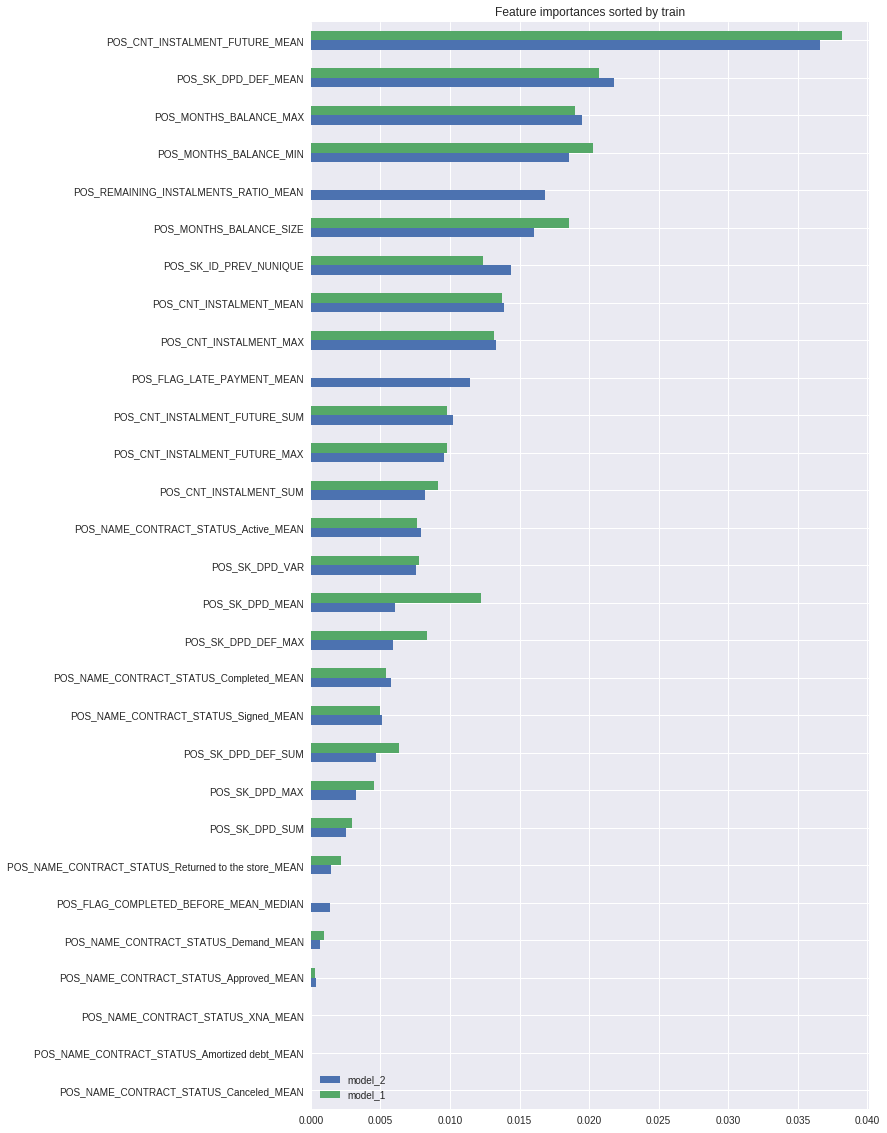

In [0]:
ax = imp.sort_values('model_2').plot.barh(
    title='Feature importances sorted by train', figsize=(10,20))

In [0]:
# Drop some less-information features
imp[imp['model_2'] == 0].index

Index(['POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN',
       'POS_NAME_CONTRACT_STATUS_Canceled_MEAN',
       'POS_NAME_CONTRACT_STATUS_XNA_MEAN'],
      dtype='object')